Statistical Modelling using Python

In [122]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [8]:
# Loading the Data
MusicData = pd.read_csv('/content/musicdata.csv')
MusicData.head(3)

,Unnamed: 0,Track Name,Artists,Album Name,Album ID,Track ID,Popularity,Release Date,Duration (ms),Explicit,...,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,0,Bijlee Bijlee,Harrdy Sandhu,Bijlee Bijlee,3tG0IGB24sRhGFLs5F1Km8,1iZLpuGMr4tn1F5bZu32Kb,70,2021-10-30,168450,False,...,0.670,1,-5.313,0,0.1430,0.2690,0.0,0.0733,0.643,100.004
1,1,Expert Jatt,Nawab,Expert Jatt,2gibg5SCTep0wsIMefGzkd,7rr6n1NFIcQXCsi43P0YNl,65,2018-01-18,199535,False,...,0.948,6,-2.816,0,0.1990,0.2980,0.0,0.0784,0.647,172.038
2,2,"Kaun Nachdi (From ""Sonu Ke Titu Ki Sweety"")","Guru Randhawa, Neeti Mohan",High Rated Gabru - Guru Randhawa,6EDbwGsQNQRLf73c7QwZ2f,3s7m0jmCXGcM8tmlvjCvAa,64,2019-03-02,183373,False,...,0.830,4,-3.981,0,0.0455,0.0357,0.0,0.0419,0.753,127.999


In [12]:
# Observing Column information and summary Statistics
MusicData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        100 non-null    int64  
 1   Track Name        94 non-null     object 
 2   Artists           94 non-null     object 
 3   Album Name        94 non-null     object 
 4   Album ID          100 non-null    object 
 5   Track ID          100 non-null    object 
 6   Popularity        100 non-null    int64  
 7   Release Date      100 non-null    object 
 8   Duration (ms)     100 non-null    int64  
 9   Explicit          100 non-null    bool   
 10  External URLs     100 non-null    object 
 11  Danceability      100 non-null    float64
 12  Energy            100 non-null    float64
 13  Key               100 non-null    int64  
 14  Loudness          100 non-null    float64
 15  Mode              100 non-null    int64  
 16  Speechiness       100 non-null    float64
 17

In [15]:
MusicData.describe()
# Observation - Unnamed Column

,Unnamed: 0,Popularity,Duration (ms),Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
count,100.000000,100.000000,100.000000,100.000000,100.00000,100.00000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,49.500000,50.950000,210543.180000,0.767210,0.79763,4.54000,-4.399930,0.43000,0.115615,0.165559,0.005236,0.185791,0.659259,119.371470
std,29.011492,16.496326,37961.050214,0.085302,0.11572,3.64434,1.612703,0.49757,0.075819,0.152536,0.028979,0.170086,0.183901,29.058698
min,0.000000,0.000000,141862.000000,0.501000,0.47700,0.00000,-8.272000,0.00000,0.029400,0.001090,0.000000,0.034600,0.073900,78.991000
25%,24.750000,46.000000,186098.500000,0.714750,0.71125,1.00000,-5.465250,0.00000,0.057700,0.037500,0.000000,0.076900,0.558250,97.042500
50%,49.500000,56.500000,205076.000000,0.772000,0.81700,4.00000,-4.252500,0.00000,0.086150,0.128000,0.000000,0.122000,0.672500,107.984000
75%,74.250000,62.000000,226079.000000,0.826500,0.88125,7.25000,-3.163250,1.00000,0.160000,0.236750,0.000041,0.225250,0.793750,132.259000
max,99.000000,72.000000,367818.000000,0.959000,0.98800,11.00000,-0.223000,1.00000,0.340000,0.620000,0.270000,0.823000,0.940000,189.857000


In [16]:
# Checking any NULL Values
MusicData.isnull().sum()
# Observation - NULL Value detected in Track Name = 6, Artists = 6, Album Name = 6

,0
Unnamed: 0,0
Track Name,6
Artists,6
Album Name,6
Album ID,0
Track ID,0
Popularity,0
Release Date,0
Duration (ms),0
Explicit,0


In [90]:
# Data Cleaning

# Dropping Unnamed Column
MusicData_Clean = MusicData.drop(columns = ['Unnamed: 0'])
MusicData_Clean.head(2)

,Track Name,Artists,Album Name,Album ID,Track ID,Popularity,Release Date,Duration (ms),Explicit,External URLs,...,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,Bijlee Bijlee,Harrdy Sandhu,Bijlee Bijlee,3tG0IGB24sRhGFLs5F1Km8,1iZLpuGMr4tn1F5bZu32Kb,70,2021-10-30,168450,False,https://open.spotify.com/track/1iZLpuGMr4tn1F5...,...,0.670,1,-5.313,0,0.143,0.269,0.0,0.0733,0.643,100.004
1,Expert Jatt,Nawab,Expert Jatt,2gibg5SCTep0wsIMefGzkd,7rr6n1NFIcQXCsi43P0YNl,65,2018-01-18,199535,False,https://open.spotify.com/track/7rr6n1NFIcQXCsi...,...,0.948,6,-2.816,0,0.199,0.298,0.0,0.0784,0.647,172.038


In [91]:
# Filling NULL values with Unknown
MusicData_Clean = MusicData_Clean.fillna("Unknown")
MusicData_Clean.isnull().sum()

,0
Track Name,0
Artists,0
Album Name,0
Album ID,0
Track ID,0
Popularity,0
Release Date,0
Duration (ms),0
Explicit,0
External URLs,0


In [92]:
MusicData_Clean.count()

,0
Track Name,100
Artists,100
Album Name,100
Album ID,100
Track ID,100
Popularity,100
Release Date,100
Duration (ms),100
Explicit,100
External URLs,100


In [93]:
# We will be examining Popularity with other features

# Calculating numbers of bin we should have
np.sqrt(MusicData_Clean.Popularity.count())

10.0

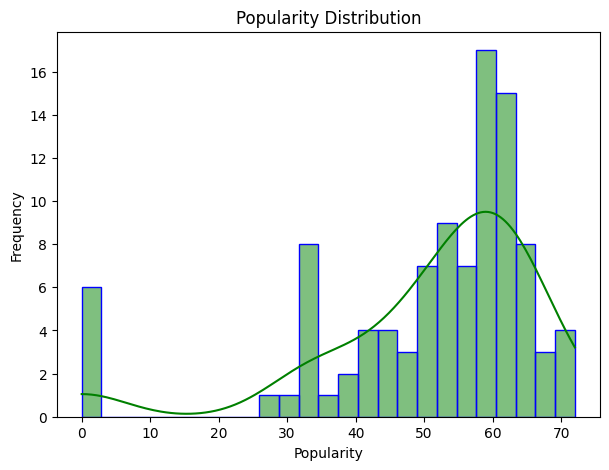

In [94]:
# Plotting
plt.figure(figsize = (7, 5))
sns.histplot(MusicData_Clean.Popularity, bins = 25, kde = True, color = 'Green', edgecolor = "blue")
plt.title('Popularity Distribution')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()
# As per the bin calculation, that is 10, we are not getting an indepth insight so updated to 25

# Observation - Peak around 50 to 65
      # Most Tracks have moderate to high Popularity

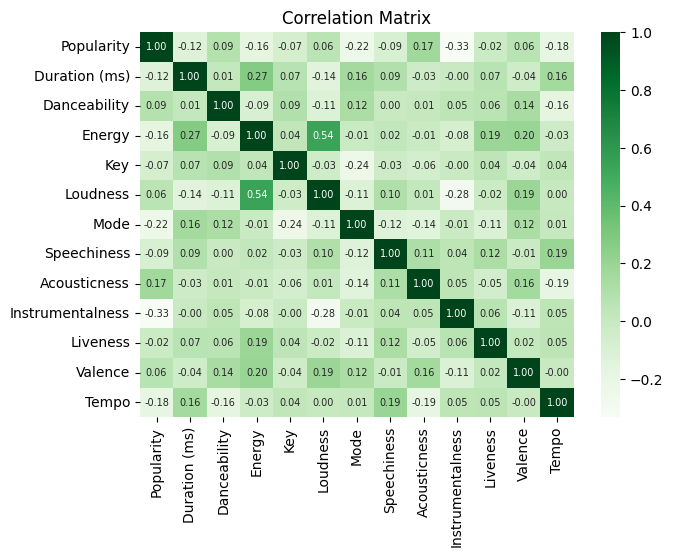

In [95]:
# Correlation Matrix
  # Converting Data to Float to get desired result
MusicData_Clean_Float = MusicData_Clean.select_dtypes(include = ['float64', 'int64'])

plt.figure(figsize=(7,5))
MusicData_Clean_Float.corr()
sns.heatmap(MusicData_Clean_Float.corr(), annot = True, cmap = 'Greens', fmt=".2f", annot_kws = {'fontsize':7})
plt.title('Correlation Matrix')
plt.show()

# Observation
  # Positive Corr with Danceability, Loudness, Acousticness, Valance
  # Negative Corr with Mode, Instrumentalness,Tempo

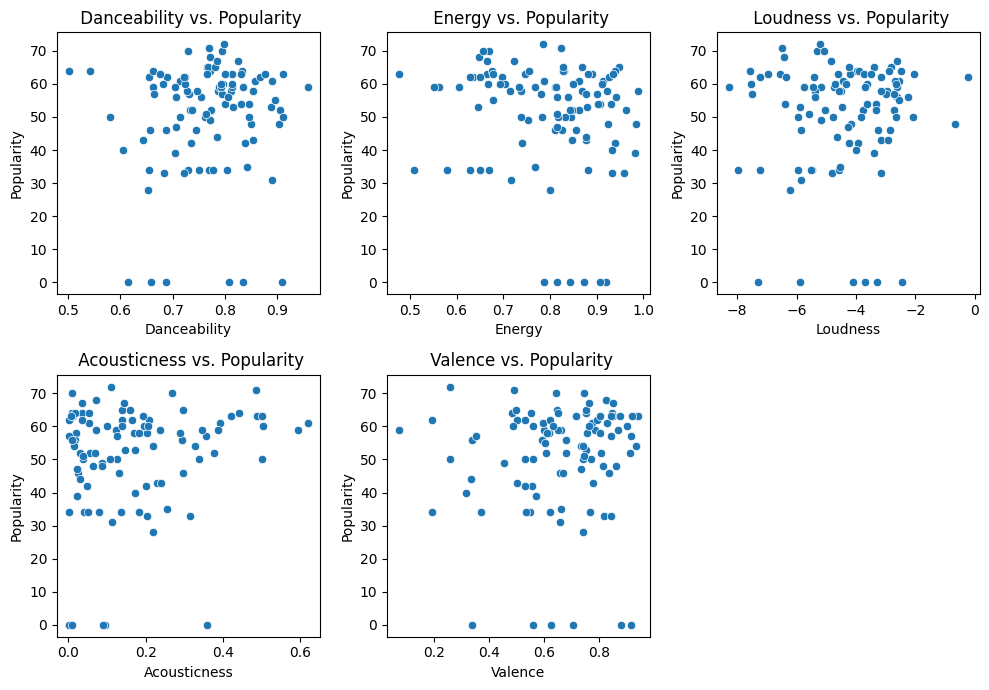

In [106]:
# Individual Feature Impact using Scatter Plot
  # Danceability vs. Popularity
  # Energy vs. Popularity
  # Loudness vs. Popularity
  # Acousticness vs. Popularity
  # Valence vs. Popularity

features = ['Danceability', 'Energy', 'Loudness', 'Acousticness','Valence']
plt.figure(figsize=(10,7))

for i, feature in enumerate(features,1):
  plt.subplot(2,3,i)
  sns.scatterplot(x=MusicData_Clean[feature], y=MusicData_Clean['Popularity'])
  plt.title(f' {feature} vs. Popularity')
  plt.xlabel(feature)
  plt.ylabel("Popularity")

plt.tight_layout()
plt.show()

# Observation
  # Danceability vs. Popularity - Positive
  # Energy vs. Popularity - Positive
  # Loudness vs. Popularity - Moderate
  # Acousticness vs. Popularity - Negative
  # Valence vs. Popularity - Positive

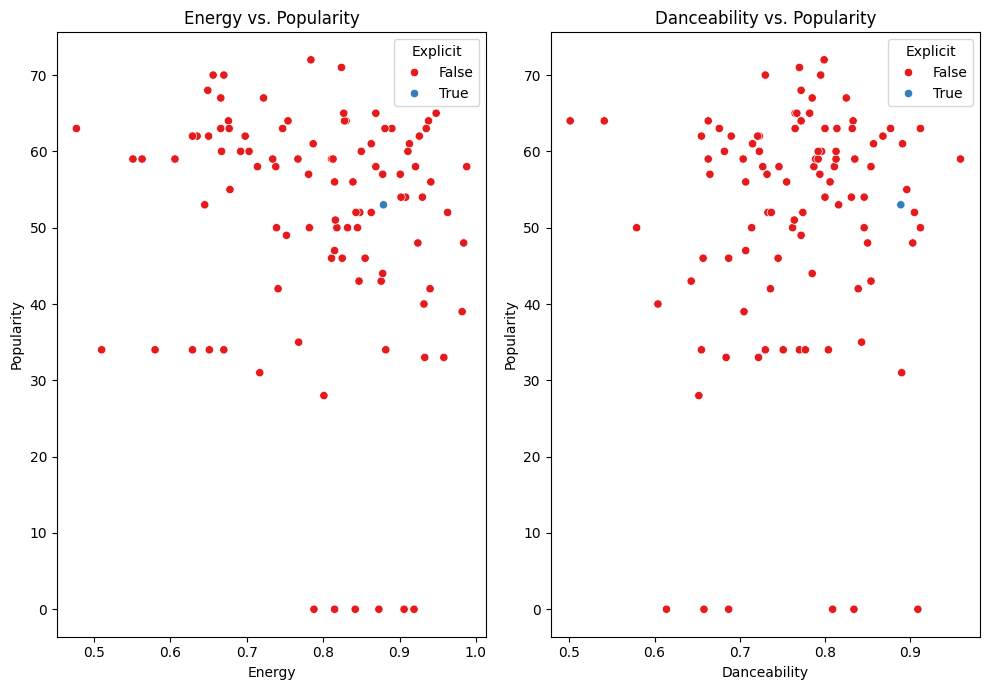

In [121]:
# We have a column of Explicit Data (True and False)
  # We can get some insights from it

# Comparing Energy and Dancability

plt.figure(figsize=(10,7))

# Energy vs Popularity
plt.subplot(1,2,1)
sns.scatterplot(x = 'Energy', y = 'Popularity',hue= 'Explicit', data = MusicData_Clean,palette='Set1')
plt.title("Energy vs. Popularity")
plt.xlabel('Energy')
x = np.linspace(0, 0.2, 100)
plt.ylabel("Popularity")

# Dancability vs Popularity
plt.subplot(1,2,2)
sns.scatterplot(x = 'Danceability', y = 'Popularity',hue= 'Explicit', data = MusicData_Clean,palette='Set1')
plt.title("Danceability vs. Popularity")
plt.xlabel('Danceability')
x = np.linspace(0, 0.2, 1)
plt.ylabel("Popularity")

plt.tight_layout()
plt.show()

# Observation
  # Energy vs. Popularity - Both Explicit and Non- Explicit shows Positive but acheive higher popularity at lower energy level
  # Dancability vs Popularity - Both Explicit and Non- Explicit shows Positive but a cluster is observed on high scale

In [129]:
# Statistical Modelling of Music Features

# Preparing Data
  # Explicit is boolean, converting to int

MusicData_Clean['Explicit'] = MusicData_Clean['Explicit'].astype(int)

# Features and Target Model
features = ['Danceability', 'Energy', 'Loudness', 'Acousticness', 'Valence', 'Explicit', 'Key', 'Mode', 'Speechiness', 'Instrumentalness', 'Tempo']
X = MusicData_Clean[features]
y = MusicData_Clean['Popularity']

# Standarizing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Training and Testing Data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Training
model = LinearRegression()
model.fit(X_train, y_train)

# Prediction
y_prediction = model.predict(X_test)

# Evaluating
MSE = mean_squared_error(y_test, y_prediction)
R2 = r2_score(y_test, y_prediction)

# Coefficient

Coefficient = pd.Series(model.coef_, index=features)
Coefficient

,0
Danceability,1.249640e+00
Energy,-3.204815e+00
Loudness,1.141456e+00
Acousticness,2.469403e+00
Valence,2.125671e+00
Explicit,1.620926e-14
Key,-3.189486e+00
Mode,-5.859715e+00
Speechiness,3.398224e-02
Instrumentalness,3.390750e-01


In [ ]:
 # Danceability (1.249640), Loudness (1.141456), Acousticness (2.469403), and Valence (2.125671) all have positive coefficients - More Popular

 # Energy (-3.204815), Key (-3.189486), Mode (-5.859715), and Tempo (-1.865736) are negatively associated with popularity - Less Popular